## 📘 Level 2 – Task 1: Table Booking and Online Delivery


### 🎯 Objective:
Analyze the availability and impact of table booking and online delivery services among restaurants.


In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline


In [4]:
# Load Preprocessed Dataset
df = pd.read_csv('C:/Users/Rajender Reddy/Desktop/DATA SCIENCE/Restaurant Insights Exploration/Level 1/preprocessed_dataset.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Check Table Booking & Online Delivery Columns
print(df[['Has Table booking', 'Has Online delivery']].nunique())
print(df['Has Table booking'].value_counts())
print(df['Has Online delivery'].value_counts())


Has Table booking      2
Has Online delivery    2
dtype: int64
Has Table booking
No     8393
Yes    1158
Name: count, dtype: int64
Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64


Percentage of Restaurants Offering Table Booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64


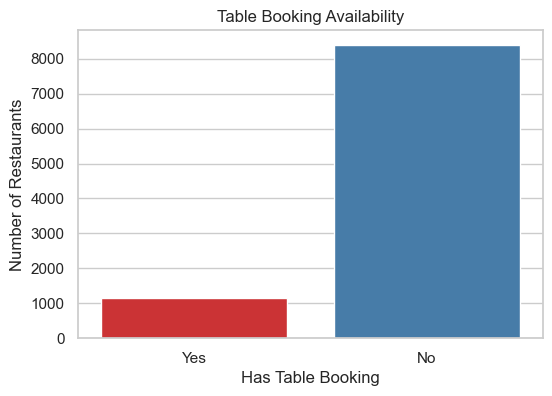

In [7]:
#  Calculate % of Restaurants Offering Table Booking
table_booking_counts = df['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Table Booking:\n", table_booking_counts)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Has Table booking', hue='Has Table booking', palette='Set1', legend=False)
plt.title('Table Booking Availability')
plt.xlabel('Has Table Booking')
plt.ylabel('Number of Restaurants')
plt.show()



✅ Average Rating for Restaurants WITH Table Booking: 3.44


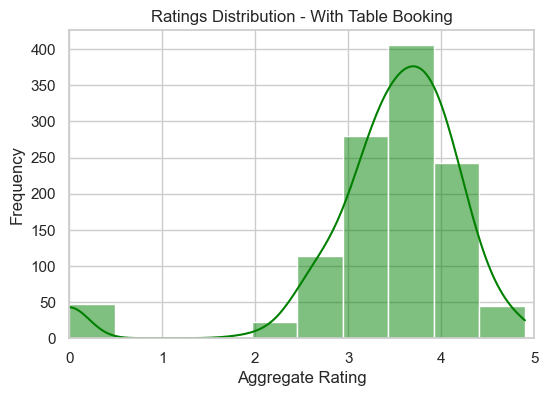

In [14]:
# Compare Average Ratings With and Without Table Booking

# Filter restaurants with table booking
with_booking = df[df['Has Table booking'] == 'Yes']

# Calculate average rating
avg_rating_with_booking = with_booking['Aggregate rating'].mean()
print(f"✅ Average Rating for Restaurants WITH Table Booking: {avg_rating_with_booking:.2f}")

# Plot rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(with_booking['Aggregate rating'], bins=10, color='green', kde=True)
plt.title('Ratings Distribution - With Table Booking')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xlim(0, 5)

plt.savefig('with_table_booking_rating.png', dpi=300, bbox_inches='tight')  # ✅ Save before show
plt.show()



❌ Average Rating for Restaurants WITHOUT Table Booking: 2.56


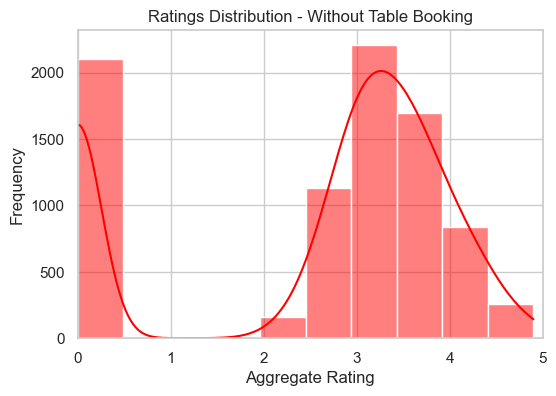

In [15]:
# Average Rating for Restaurants WITHOUT Table Booking

# Filter restaurants without table booking
without_booking = df[df['Has Table booking'] == 'No']

# Calculate average rating
avg_rating_without_booking = without_booking['Aggregate rating'].mean()
print(f"❌ Average Rating for Restaurants WITHOUT Table Booking: {avg_rating_without_booking:.2f}")

# Plot rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(without_booking['Aggregate rating'], bins=10, color='red', kde=True)
plt.title('Ratings Distribution - Without Table Booking')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xlim(0, 5)

plt.savefig('without_table_booking_rating.png', dpi=300, bbox_inches='tight') 
plt.show()



In [10]:
#  Analyze Online Delivery Availability Across Price Ranges
price_map = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Luxury'}
df['Price Category'] = df['Price range'].map(price_map)


# Calculate normalized delivery percentages by price category
delivery_by_price = df.groupby('Price Category')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print(delivery_by_price)

# Create and save the plot
plt.figure(figsize=(8, 6))
delivery_by_price.plot(kind='bar', stacked=True, colormap='Set3')

plt.title('Online Delivery Availability by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery')
plt.tight_layout()

# Save before showing
plt.savefig('online_delivery_by_price_category.png', dpi=300, bbox_inches='tight')
plt.show()


## 📊 Task 1 Completed



- 📊 **Calculated** the percentage of restaurants that:
  - Offer **Table Booking**
  - Provide **Online Delivery**

- 📈 **Compared** the average `Aggregate rating`:
  - Between restaurants **with** and **without** table booking

- 💵 **Analyzed** online delivery distribution across different **Price Ranges**:
  - Mapped numeric price levels (1–4) to categories: `Low`, `Medium`, `High`, and `Luxury`
  - Grouped and visualized delivery trends across price categories

- 📉 **Visualized** results using:
  - Count plots for booking and delivery availability
  - Bar plots for average ratings and price-based delivery trends


### 📌 Outcome:
Identified key trends in how service features (like table booking and delivery) relate to customer ratings and pricing strategies. These insights are useful for improving customer satisfaction and operational decisions.


## 📘 Level 2 – Task 2: Price Range Analysis


### 🎯 Objective:
Analyze the distribution of price ranges among restaurants and their relationship with average ratings and rating colors.


In [20]:
# Load Preprocessed Data 
df = pd.read_csv('C:/Users/Rajender Reddy/Desktop/DATA SCIENCE/Restaurant Insights Exploration/Level 1/preprocessed_dataset.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [21]:
#  Map Numeric Price Range to Descriptive Categories
price_labels = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Luxury'}
df['Price Category'] = df['Price range'].map(price_labels)


Price Category
Low       4444
Medium    3113
High      1408
Luxury     586
Name: count, dtype: int64


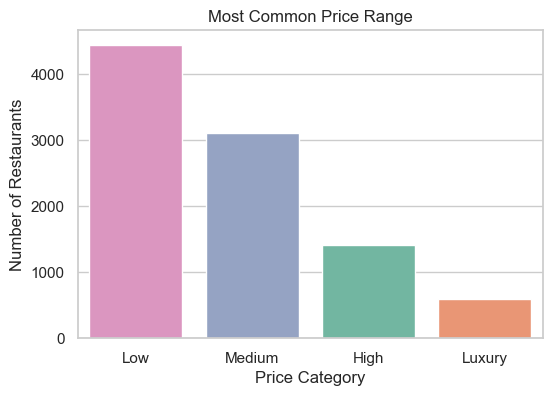

In [23]:
# most common price range among all the restaurants
price_counts = df['Price Category'].value_counts()
print(price_counts)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Price Category', order=price_counts.index,
              hue='Price Category', palette='Set2', legend=False)
plt.title('Most Common Price Range')
plt.xlabel('Price Category')
plt.ylabel('Number of Restaurants')
plt.show()


Price Category
Luxury    3.817918
High      3.683381
Medium    2.941054
Low       1.999887
Name: Aggregate rating, dtype: float64


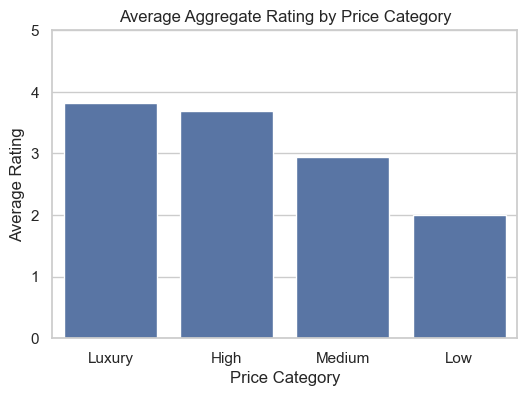

In [25]:
# Calculate the average rating for each price range.
avg_rating_price = df.groupby('Price Category')['Aggregate rating'].mean().sort_values(ascending=False)
print(avg_rating_price)

plt.figure(figsize=(6,4))
sns.barplot(x=avg_rating_price.index, y=avg_rating_price.values)
plt.title('Average Aggregate Rating by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.show()


In [26]:
# Identify the color that represents the highest average rating among different price ranges.
# Find price category with highest avg rating
highest_avg_price_cat = avg_rating_price.idxmax()

# Get mode of 'Rating color' for restaurants in that category
rating_color_mode = df[df['Price Category'] == highest_avg_price_cat]['Rating color'].mode()[0]
print(f"The price category with the highest average rating is '{highest_avg_price_cat}' with rating color '{rating_color_mode}'.")


The price category with the highest average rating is 'Luxury' with rating color 'Yellow'.


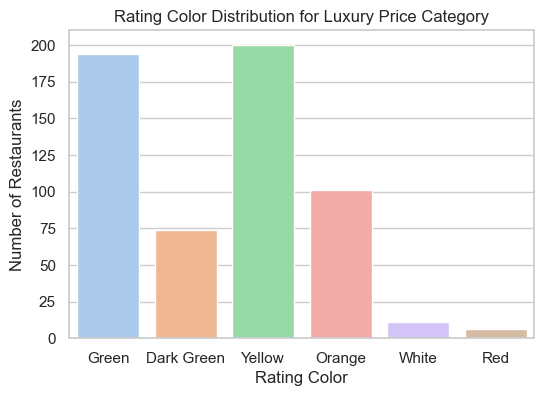

In [28]:
# Visualize Rating Color Distribution for that Price Category
plt.figure(figsize=(6,4))
sns.countplot(data=df[df['Price Category'] == highest_avg_price_cat],
              x='Rating color',
              hue='Rating color',
              palette='pastel',
              legend=False)
plt.title(f'Rating Color Distribution for {highest_avg_price_cat} Price Category')
plt.xlabel('Rating Color')
plt.ylabel('Number of Restaurants')
plt.show()


## 📊 Task 2 Completed


- 🔍 **Determined** the most common price range across all restaurants.
- 📊 **Calculated** the average `Aggregate rating` for each price range.
- 🎨 **Identified** the color representing the highest average rating among different price ranges.
- 📈 **Visualized** the price range distribution and average ratings using bar plots and count plots.


### 📌 Outcome:
Understanding how price categories relate to customer ratings and their visual representation, which provides insights into customer preferences and restaurant positioning.


## 📘 Level 2 – Task 3: Feature Engineering


### 🎯 Objective:
Create new features from existing data to enhance model performance and uncover deeper insights.


In [2]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('C:/Users/Rajender Reddy/Desktop/DATA SCIENCE/Restaurant Insights Exploration/Level 1/preprocessed_dataset.csv')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
# Extract additional features from the existing columns 
# Extract Length-Based Features 
# Length of restaurant name
df['Name Length'] = df['Restaurant Name'].astype(str).apply(len)

# Length of address
df['Address Length'] = df['Address'].astype(str).apply(len)

# Number of cuisines listed
df['Cuisine Count'] = df['Cuisines'].astype(str).apply(lambda x: len(x.split(',')))



In [5]:
# Encode Categorical Service Features
# Convert Table Booking
df['Has Table booking (bin)'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

# Convert Online Delivery
df['Has Online delivery (bin)'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})



In [6]:
df.to_csv('feature_engineered_dataset.csv', index=False)
print("✅ Feature engineered dataset saved as 'feature_engineered_dataset.csv'")


✅ Feature engineered dataset saved as 'feature_engineered_dataset.csv'


In [7]:
df[['Restaurant Name', 'Name Length', 'Address Length', 'Cuisine Count',
    'Has Table booking', 'Has Table booking (bin)',
    'Has Online delivery', 'Has Online delivery (bin)']].head()


,Restaurant Name,Name Length,Address Length,Cuisine Count,Has Table booking,Has Table booking (bin),Has Online delivery,Has Online delivery (bin)
0,Le Petit Souffle,16,71,3,Yes,1,No,0
1,Izakaya Kikufuji,16,67,1,Yes,1,No,0
2,Heat - Edsa Shangri-La,22,56,4,Yes,1,No,0
3,Ooma,4,70,2,No,0,No,0
4,Sambo Kojin,11,64,2,Yes,1,No,0
